In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import pandas as pd
import plotly.express as ply
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels import tsa
import numpy as np
import statistics
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import folium
import os
#from fbprophet import Prophet
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
pd.set_option('display.max_rows',20000, 'display.max_columns',100)
import datetime as datetime
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [3]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from math import  sqrt
from sklearn.metrics import mean_squared_error

In [4]:
from pmdarima import auto_arima

In [5]:
df=pd.read_csv('covid_19_india.csv')

In [6]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [7]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [8]:
df['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****'],
      dtype=object)

In [9]:
import datetime

In [10]:
df['Date']=pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [11]:
df.set_index('Date',inplace=True)

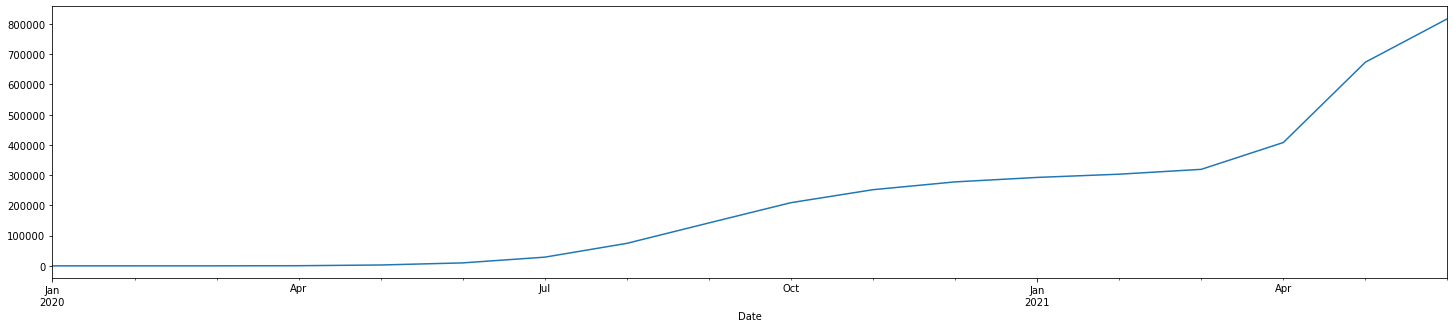

In [12]:
df['Confirmed'].resample(rule='M').mean().plot(figsize=(25,5))

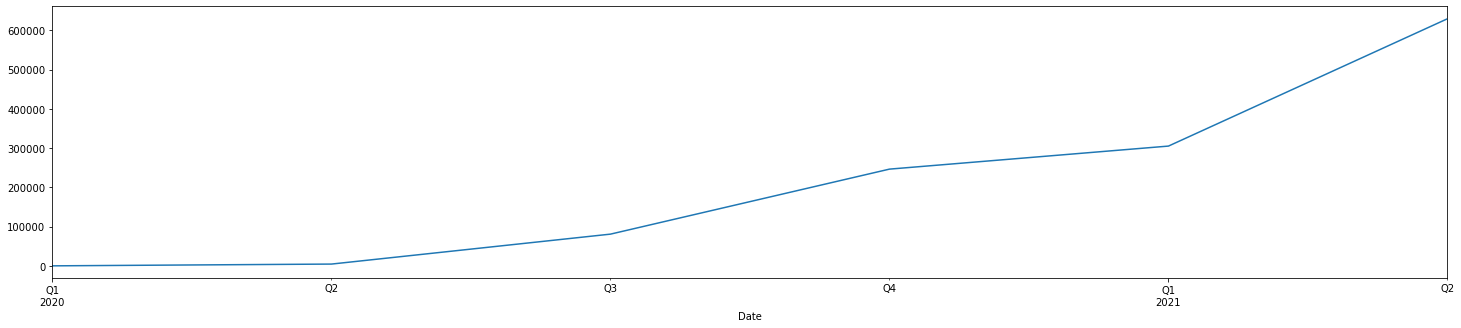

In [13]:
df['Confirmed'].resample(rule='Q').mean().plot(figsize=(25,5))

In [14]:
df1=pd.DataFrame()
df1=df.drop(columns=['Sno','Time','ConfirmedIndianNational','State/UnionTerritory','ConfirmedForeignNational','Cured','Deaths'])

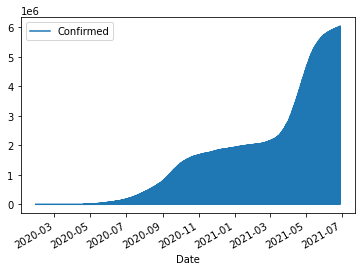

In [15]:
df1.plot()

In [16]:
df_day=df1.resample('D').sum()

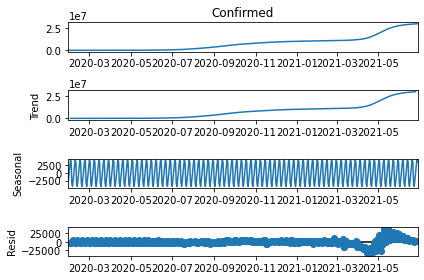

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_day['Confirmed'])
result.plot()
plt.show()

In [18]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.Rolling.mean(timeseries, window=24)
    rolmean = timeseries.rolling(12).mean()
    #rolstd = pd.Rolling.std(timeseries, window=24)
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))

    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
              dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

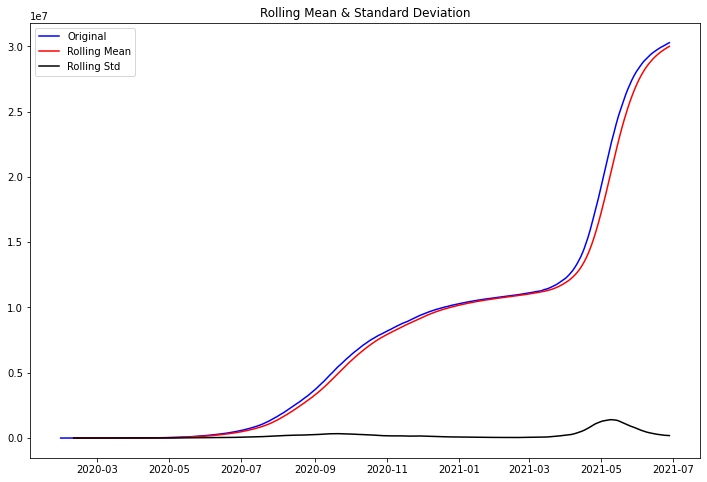

Test Statistic                   2.019209
p-value                          0.998697
#Lags Used                      17.000000
Number of Observations Used    498.000000
Critical Value (1%)             -3.443549
Critical Value (5%)             -2.867361
Critical Value (10%)            -2.569870
dtype: float64


In [19]:
test_stationarity(df_day['Confirmed'])

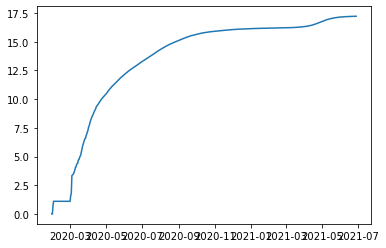

In [20]:
import numpy as np
log_df = np.log(df_day)
plt.plot(log_df)

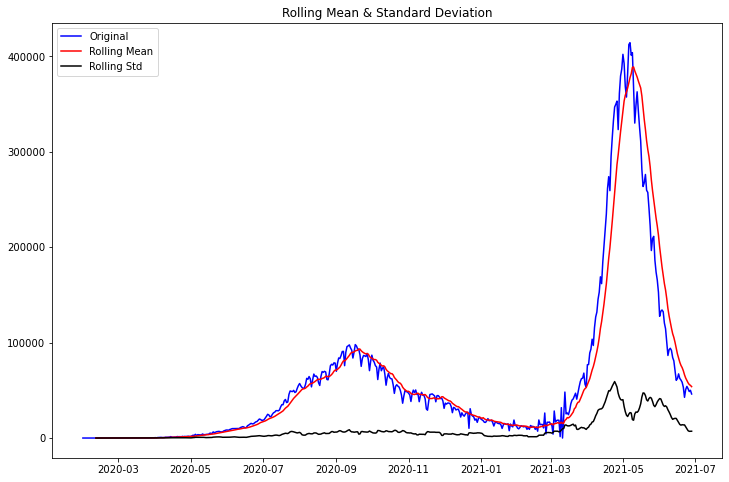

Test Statistic                  -3.016921
p-value                          0.033344
#Lags Used                      16.000000
Number of Observations Used    498.000000
Critical Value (1%)             -3.443549
Critical Value (5%)             -2.867361
Critical Value (10%)            -2.569870
dtype: float64


In [21]:
df_day['diff1']=df_day['Confirmed']-df_day['Confirmed'].shift(1)
test_stationarity(df_day['diff1'].dropna())

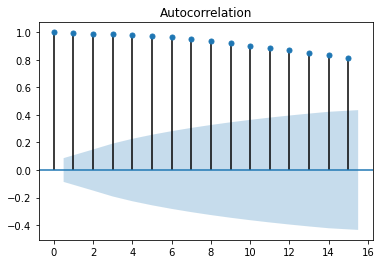

In [22]:
plot_acf(df_day['diff1'].dropna(),lags=15)
plt.show()

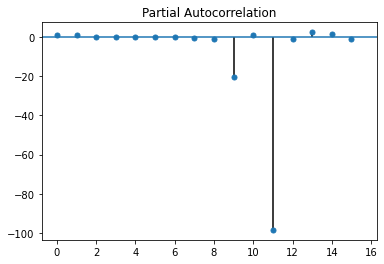

In [23]:
plot_pacf(df_day['diff1'].dropna(),lags=15)
plt.show()

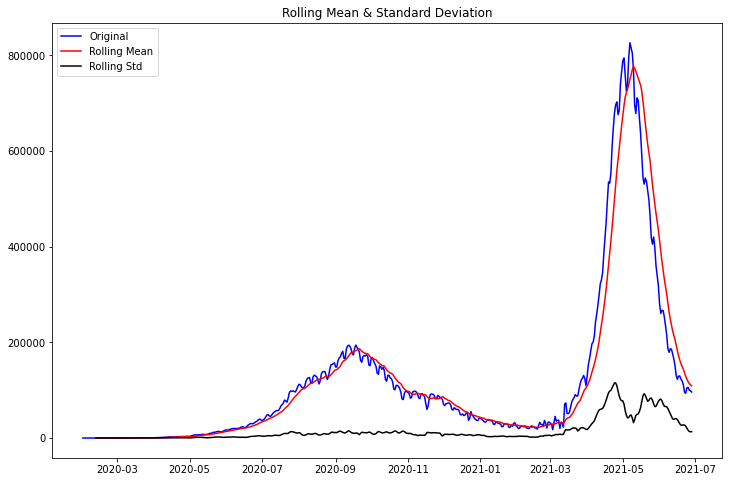

Test Statistic                  -2.472831
p-value                          0.122226
#Lags Used                      19.000000
Number of Observations Used    494.000000
Critical Value (1%)             -3.443657
Critical Value (5%)             -2.867408
Critical Value (10%)            -2.569896
dtype: float64


In [24]:
df_day['diff2']=df_day['Confirmed']-df_day['Confirmed'].shift(2)
test_stationarity(df_day['diff2'].dropna())

In [25]:
from statsmodels.tsa.arima.model import ARIMA

In [26]:
auto_arima_model=auto_arima(df_day['Confirmed'],trace=True,Supress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=10681.652, Time=0.22 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=10712.056, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=10711.230, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=10711.262, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=10675.527, Time=0.16 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=10713.311, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=10679.123, Time=0.12 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=10737.110, Time=0.14 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=10708.278, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=10676.994, Time=0.23 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=10684.211, Time=0.33 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=10677.398, Time=0.36 sec

Best model:  ARIMA(1,2,2)(0,0,0)[0]          
Total fit time: 1.732 seconds


In [27]:
#Best Model 
arima_model_202 = ARIMA(df_day['Confirmed'].dropna(), order=(1,2,2)).fit()

In [28]:
arima_model_202.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Confirmed   No. Observations:                  516
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -5333.764
Date:                Sat, 03 Jul 2021   AIC                          10675.527
Time:                        20:10:43   BIC                          10692.496
Sample:                    01-30-2020   HQIC                         10682.178
                         - 06-28-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9619      0.011     84.041      0.000       0.939       0.984
ma.L1         -1.0204      0.020    -50.455      0.000      -1.060      -0.981
ma.L2          0.1403      0.022      6.253      0.000       0.096       0.184
sigma2      6.591e+07   5.69e-11   1.16e+18      0.000    6.59e+07    6.59e+07
===================================================================================
Ljung-Box (Q):                      922.21   Jarque-Bera (JB):              1090.55
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             331.34   Skew:                            -0.75
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.01e+33. Standard errors may be unstable.
"""

In [29]:
start = df_day.index.get_loc('2020-10-6')
end = df_day.index.get_loc('2021-05-28')
print(start,'to',end)

250 to 484


In [30]:
 predict_1= arima_model_202.predict(start=start+1 ,end=end+1, dynamic= False) 

In [31]:
#Trying to forecast future values
pred_future_10101=arima_model_202.predict(start=len(df_day)+1,end=len(df_day)+(180),dynamic=False)
print("The length of pred_future values :",len(pred_future_10101))

The length of pred_future values : 180


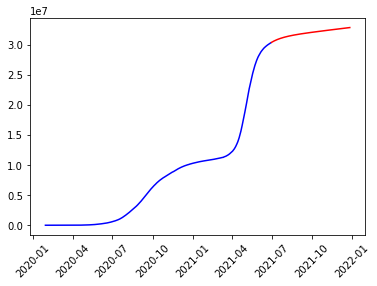

In [32]:
plt.plot(df_day['Confirmed'],color='blue')
#plt.plot(predict_1,color='yellow')
plt.plot(pred_future_10101,color='red')
plt.xticks(rotation=45)
plt.show()

Statewise prediction

In [33]:
df2=df.drop(columns=['Sno','Time','ConfirmedIndianNational','ConfirmedForeignNational','Cured','Deaths'])

Kerala

In [39]:
df_kr=df2[df2['State/UnionTerritory']=='Kerala']
df_kr.head()

,State/UnionTerritory,Confirmed
Date,,
2020-01-30,Kerala,1
2020-01-31,Kerala,1
2020-02-01,Kerala,2
2020-02-02,Kerala,3
2020-02-03,Kerala,3


In [40]:
df_kr.tail()

,State/UnionTerritory,Confirmed
Date,,
2021-06-24,Kerala,2842247
2021-06-25,Kerala,2854325
2021-06-26,Kerala,2865871
2021-06-27,Kerala,2877989
2021-06-28,Kerala,2888894


In [41]:
auto_arima_model1=auto_arima(df_kr['Confirmed'],trace=True,Supress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=9203.288, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=9265.606, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=9252.042, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=9232.173, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=9180.648, Time=0.12 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=9204.855, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=9218.553, Time=0.04 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=9178.983, Time=0.30 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=9206.466, Time=0.05 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=9090.713, Time=0.38 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=9101.020, Time=0.61 sec
 ARIMA(2,2,4)(0,0,0)[0]             : AIC=9105.523, Time=0.72 sec
 ARIMA(1,2,4)(0,0,0)[0]             : AIC=9122.250, Time=0.23 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=9207.797, Time=0.14 sec
 ARIMA(3,2,4)(0,0,0)[0]          

The length of pred_future values : 150


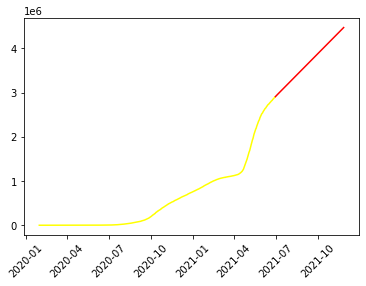

In [42]:
arima_model_424 = ARIMA(df_kr['Confirmed'].dropna(), order=(1,2,5)).fit()
start = df_day.index.get_loc('2020-01-30')
end = df_day.index.get_loc('2021-06-28')
predict2= arima_model_424.predict(start=start+1 ,end=end+1, dynamic= False)
pred_future=arima_model_424.predict(start=len(df_kr)+1,end=len(df_kr)+(150),dynamic=False)
print("The length of pred_future values :",len(pred_future))
#plt.plot(df_od['Confirmed'],color='blue')
plt.plot(predict2,color='yellow')
plt.plot(pred_future,color='red')
plt.xticks(rotation=45)
plt.show()

Maharashtra

In [34]:
df_mh=df2[df2['State/UnionTerritory']=='Maharashtra']
df_mh.head()

,State/UnionTerritory,Confirmed
Date,,
2020-03-09,Maharashtra,2
2020-03-10,Maharashtra,5
2020-03-11,Maharashtra,2
2020-03-12,Maharashtra,11
2020-03-13,Maharashtra,14


In [35]:
df_mh.tail()

,State/UnionTerritory,Confirmed
Date,,
2021-06-24,Maharashtra,5997587
2021-06-25,Maharashtra,6007431
2021-06-26,Maharashtra,6017035
2021-06-27,Maharashtra,6026847
2021-06-28,Maharashtra,6036821


In [36]:
auto_arima_model1=auto_arima(df_mh['Confirmed'],trace=True,Supress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=8809.439, Time=0.47 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=8921.108, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=8892.442, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=8879.331, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=8878.217, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=8877.652, Time=0.05 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=8810.216, Time=0.56 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=8852.328, Time=0.62 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=8877.339, Time=0.04 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=8811.337, Time=0.49 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=8879.167, Time=0.09 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=8827.194, Time=0.35 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=8816.853, Time=0.64 sec

Best model:  ARIMA(2,2,2)(0,0,0)[0]          
Total fit time: 3.429 seconds


The length of pred_future values : 150


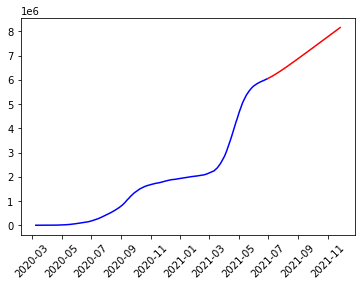

In [38]:
arima_model_424 = ARIMA(df_mh['Confirmed'].dropna(), order=(2,2,2)).fit()
start = df_day.index.get_loc('2020-03-09')
end = df_day.index.get_loc('2021-06-28')
predict2= arima_model_424.predict(start=start+1 ,end=end+1, dynamic= False)
pred_future=arima_model_424.predict(start=len(df_mh)+1,end=len(df_mh)+(150),dynamic=False)
print("The length of pred_future values :",len(pred_future))
plt.plot(df_mh['Confirmed'],color='blue')
#plt.plot(predict2,color='yellow')
plt.plot(pred_future,color='red')
plt.xticks(rotation=45)
plt.show()

Odisha

In [45]:
df_od=df2[df2['State/UnionTerritory']=='Odisha']
df_od.head()

,State/UnionTerritory,Confirmed
Date,,
2020-03-16,Odisha,1
2020-03-17,Odisha,1
2020-03-18,Odisha,1
2020-03-19,Odisha,1
2020-03-20,Odisha,2


In [46]:
auto_arima_model1=auto_arima(df_od['Confirmed'],trace=True,Supress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=6994.859, Time=0.26 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=7058.983, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=7020.564, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=7027.546, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=7020.566, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=7020.666, Time=0.06 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=7010.328, Time=0.37 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=6994.491, Time=0.38 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=7020.135, Time=0.08 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=6995.890, Time=0.42 sec
 ARIMA(2,2,4)(0,0,0)[0]             : AIC=7017.586, Time=0.27 sec
 ARIMA(1,2,4)(0,0,0)[0]             : AIC=7022.235, Time=0.06 sec
 ARIMA(3,2,4)(0,0,0)[0]             : AIC=6990.848, Time=0.57 sec
 ARIMA(4,2,4)(0,0,0)[0]             : AIC=6941.312, Time=0.76 sec
 ARIMA(4,2,3)(0,0,0)[0]          

The length of pred_future values : 150


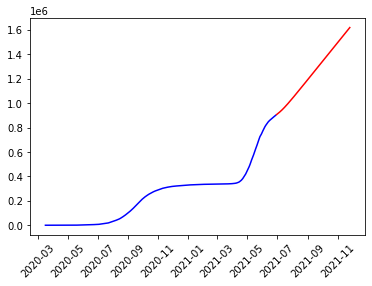

In [47]:
arima_model_424 = ARIMA(df_od['Confirmed'].dropna(), order=(4,2,4)).fit()
start = df_day.index.get_loc('2020-03-16')
end = df_day.index.get_loc('2021-06-28')
predict2= arima_model_424.predict(start=start+1 ,end=end+1, dynamic= False)
pred_future=arima_model_424.predict(start=len(df_od)+1,end=len(df_od)+(150),dynamic=False)
print("The length of pred_future values :",len(pred_future))
plt.plot(df_od['Confirmed'],color='blue')
#plt.plot(predict2,color='yellow')
plt.plot(pred_future,color='red')
plt.xticks(rotation=45)
plt.show()